We're going to be counting the occurences of various types of punctuation across the Postmodern and Post 9/11 corpora. As per usual, we will start with Postmodern, then move to Post 9/11, and finally merge.

In [12]:
# these are the imports we'll be using
import nltk
from nltk.tokenize import sent_tokenize
import glob
import numpy as np
import matplotlib.pyplot as plt
import string
import book

In [2]:
# read in all the novels in the postmodern corpus
postmodern = []

for filename in glob.glob('postmodern/*.txt'):
    try:
        postmodern.append(book.makebook(open(filename, 'r')))
    except Exception as e:
        print(book)

Calling string.punctuation doesn't give a broad enough picture of the varying oddball characters that are at play in the postmodern corpus, so we'll just go through the entirety of the corpus, and count the occurences of different characters.

In [3]:
punct = {} # creates a dictionary

for book in postmodern:
    for char in book.text:
        if char not in string.ascii_letters:
            if char in punct:
                punct[char] += 1
            else: 
                punct[char] = 1

# show the results
punct.keys()

dict_keys(['Í', 'É', '=', 'ϕ', '\n', ',', '^', '(', '–', '/', '}', 'é', '·', 'ì', '∞', 'ó', 'ç', '®', '{', '@', 'Œ', 'ü', 'ö', ']', '—', '’', '§', '0', '!', 'ô', '′', '™', 'ə', '•', '½', '2', 'â', 'á', '.', 'ñ', 'θ', 'ś', '¢', '_', 'ú', '¾', 'Ñ', '[', 'è', '1', '©', ';', '-', 'ä', '£', 'ß', 'ï', ':', '~', '“', 'û', '¡', '"', '6', 'γ', '¿', '*', 'Ü', '3', "'", 'ù', '?', 'ã', '‘', 'Æ', '5', 'ê', '”', '4', 'š', 'à', ' ', '9', 'Ô', '¼', '+', '´', 'í', '…', '&', '\\', '#', 'ð', 'Ä', '%', '>', 'ž', '$', '°', '7', 'Ê', 'Ö', '8', '«', 'Δ', 'ë', 'î', 'Ó', ')'])

There are any number of ways to group these symbols. I've lumped them into 18 different categories.

In [4]:
greek = ['ß','ϕ','γ','θ','Δ'] 
xlatin = ['ê','ï', 'ð','â','ì','É','ś','Í','ü','ô', 'ù','Ä', 'Ñ','Æ','Ó','ë','é','á', 'à', 'ú','Ê','Ü', 'ž','š','í', 'Œ', 'ñ', 'ã', 'è','î','ä', 'ə','ó','û','Ö','ç', 'ö', 'Ô']
quotes = ['“','´', "'",'’', '”','"','‘','′']
random = ['@', '#', '&','*']
conventional = ['.','!','?',',']
logical_symb = ['>','\\','=','/','~']
colon = [':']
semicolon = [';']
guillemets = ['«']
currency = ['¢','$','£']
intprop = ['™','®','©']
inverted = ['¿','¡']
ellipses = ['…']
bullets = ['•','·','§']
brackets = [')',']','}','[','(','{']
nonconv = ['°','^']
dashes = ['—','-','_','–']
math = ['∞','%','½','+','¾','¼']

mac = [greek, xlatin, quotes, random, conventional, logical_symb, colon, semicolon, guillemets, currency, intprop, inverted, ellipses, bullets, brackets, nonconv, dashes, math]

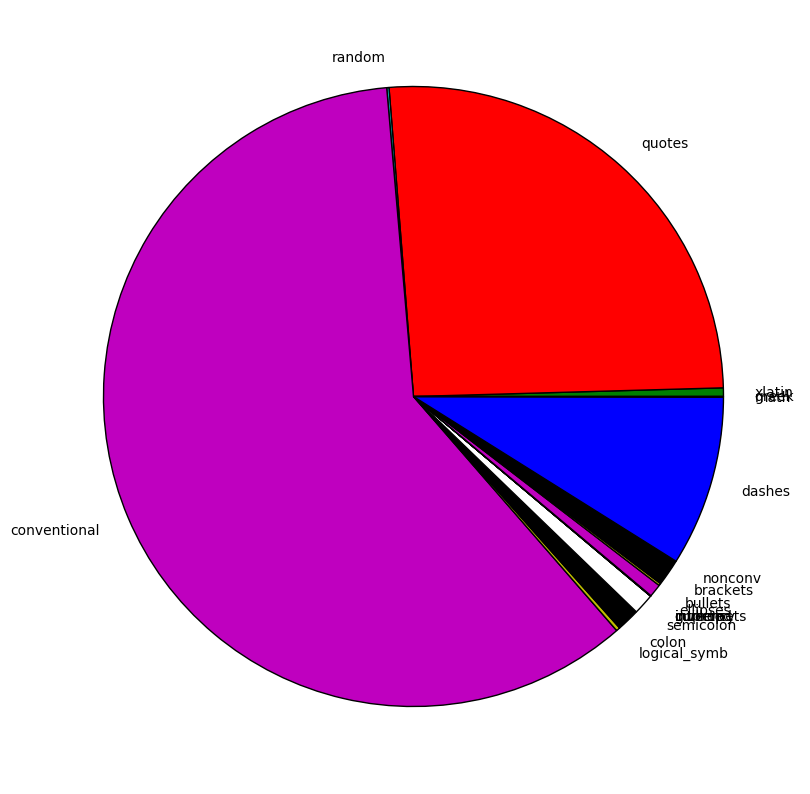

In [5]:
# lets make a pie chart
counts = [0 for x in range(len(mac))]
cats = ['greek', 'xlatin', 'quotes', 'random', 'conventional', 'logical_symb', 'colon', 'semicolon', 'guillemets', 'currency', 'intprop', 'inverted', 'ellipses', 'bullets', 'brackets', 'nonconv', 'dashes', 'math']

for cat in range(len(mac)):
    for symb in mac[cat]:
        counts[cat] += punct[symb]

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.pie(counts, labels=cats)
plt.show()

In [6]:
for x in range(len(counts)): print('{}: \t {:f}'.format(cats[x], counts[x]/sum(counts)))

greek: 	 0.000061
xlatin: 	 0.004398
quotes: 	 0.258128
random: 	 0.001191
conventional: 	 0.600011
logical_symb: 	 0.001999
colon: 	 0.011951
semicolon: 	 0.010872
guillemets: 	 0.000006
currency: 	 0.000180
intprop: 	 0.000123
inverted: 	 0.000006
ellipses: 	 0.006732
bullets: 	 0.001178
brackets: 	 0.013893
nonconv: 	 0.000104
dashes: 	 0.088874
math: 	 0.000292


In [13]:
post911 = []
punct1 = {}

for filename in glob.glob('post911/*.txt'):
    try:
        post911.append(book.makebook(open(filename, 'r')))
    except Exception as e:
        print(book)
        
post911.sort(key=lambda x: x.year)

for book in post911:
    for char in book.text:
        if char not in string.ascii_letters:
            if char in punct1:
                punct1[char] += 1
            else: 
                punct1[char] = 1

In [14]:
# add the new symbols to our old lists
math += ['±','×','∃','∀','≡']
logical_symb += ['<','∼']
random += ['¸','¯','†','⁄','→','↓','˜']
guillemets.append('»')
greek += ['β','α']
currency.append('‰')
xlatin += ['æ', 'õ']
quotes.append('`')

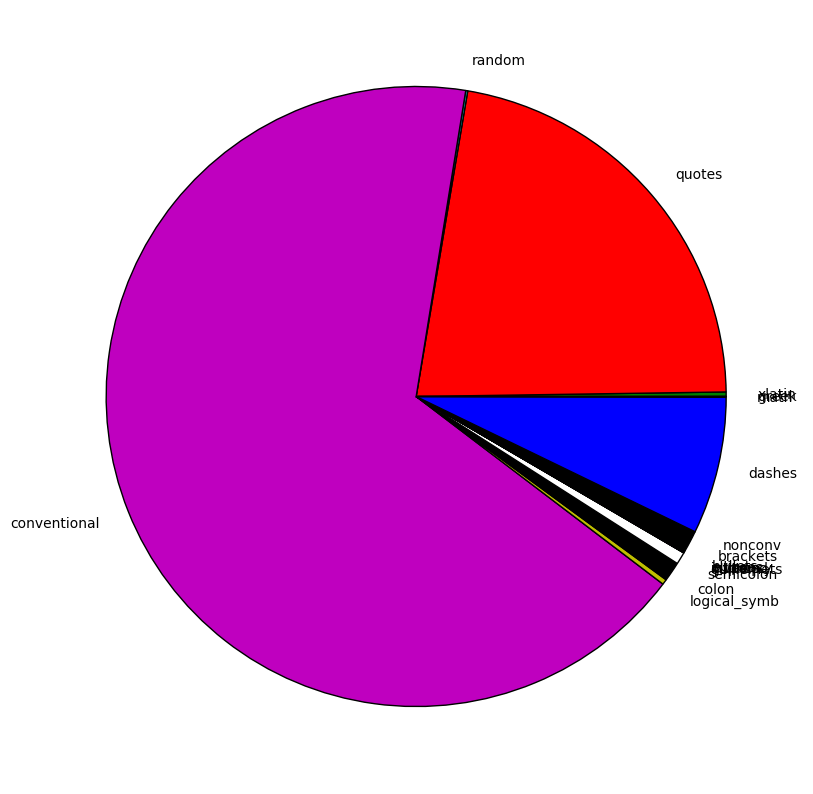

In [15]:
counts1 = [0 for x in range(len(mac))]

for cat in range(len(mac)):
    for symb in mac[cat]:
        try:
            counts1[cat] += punct1[symb]
        except:
            counts1[cat] += 0

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.pie(counts1, labels=cats)
plt.show()

In [16]:
for x in range(len(counts1)): print('{}: \t {:f}'.format(cats[x], counts1[x]/sum(counts1)))

greek: 	 0.000118
xlatin: 	 0.002227
quotes: 	 0.221030
random: 	 0.001054
conventional: 	 0.672127
logical_symb: 	 0.002738
colon: 	 0.010180
semicolon: 	 0.006373
guillemets: 	 0.000007
currency: 	 0.000330
intprop: 	 0.000072
inverted: 	 0.000012
ellipses: 	 0.000572
bullets: 	 0.000441
brackets: 	 0.010786
nonconv: 	 0.000080
dashes: 	 0.071526
math: 	 0.000326


The differences in the subcategories isn't very informative, so we'll look at how conventional punctuation changes over time.

In [30]:
pmod_conventional = [punct[c] for c in conventional]
p911_conventional = [punct1[c] for c in conventional]

for n in range(len(conventional)):
    a = pmod_conventional[n] / sum(pmod_conventional)
    b = p911_conventional[n] / sum(p911_conventional)
    print("{} : {}, {}".format(conventional[n],a,b))

. : 0.45349058599534586, 0.48238448341456763
! : 0.014692193780410409, 0.014467837684571707
? : 0.04666807700444257, 0.05054949787881616
, : 0.4851491432198011, 0.4525981810220445
